In [23]:
df = cbind(rep(0,100), rep(100,100))
tree()

In [19]:
min(lalonde$re75[lalonde$re75 != 0])

[1] 74.3435

In [49]:
min(lalonde$re78[train][lalonde$re78[train] != 0])

[1] 202.285


Regression tree:
tree(formula = u75 ~ ., data = lalonde, subset = train)
Variables actually used in tree construction:
[1] "re75"
Number of terminal nodes:  2 
Residual mean deviance:  0 = 0 / 220 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

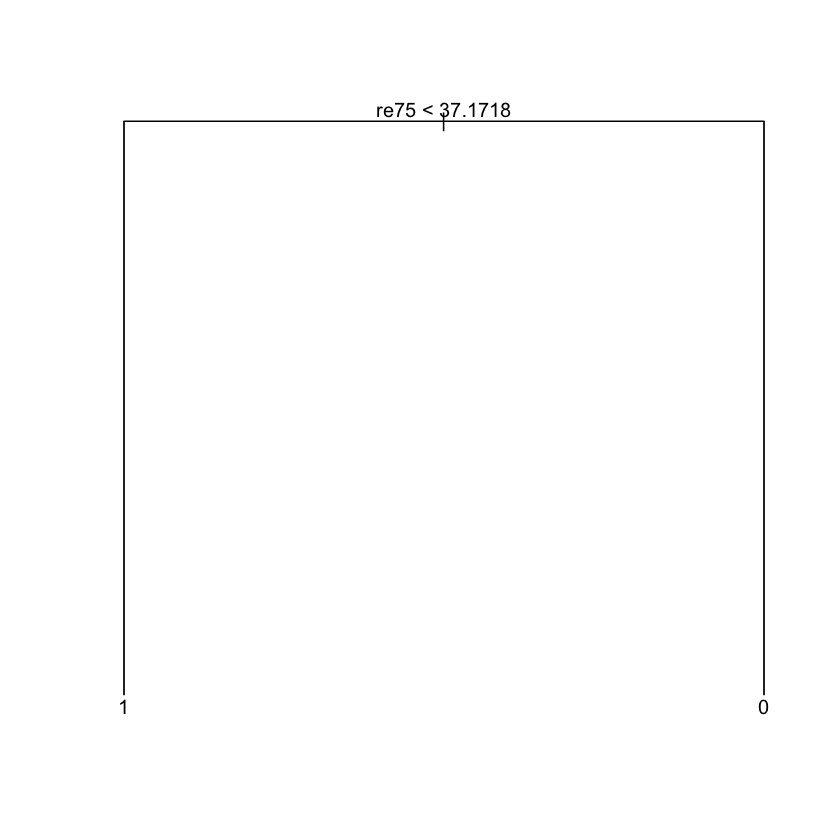

Warning message in prune.tree(tree.re75, best = 4):
“best is bigger than tree size”

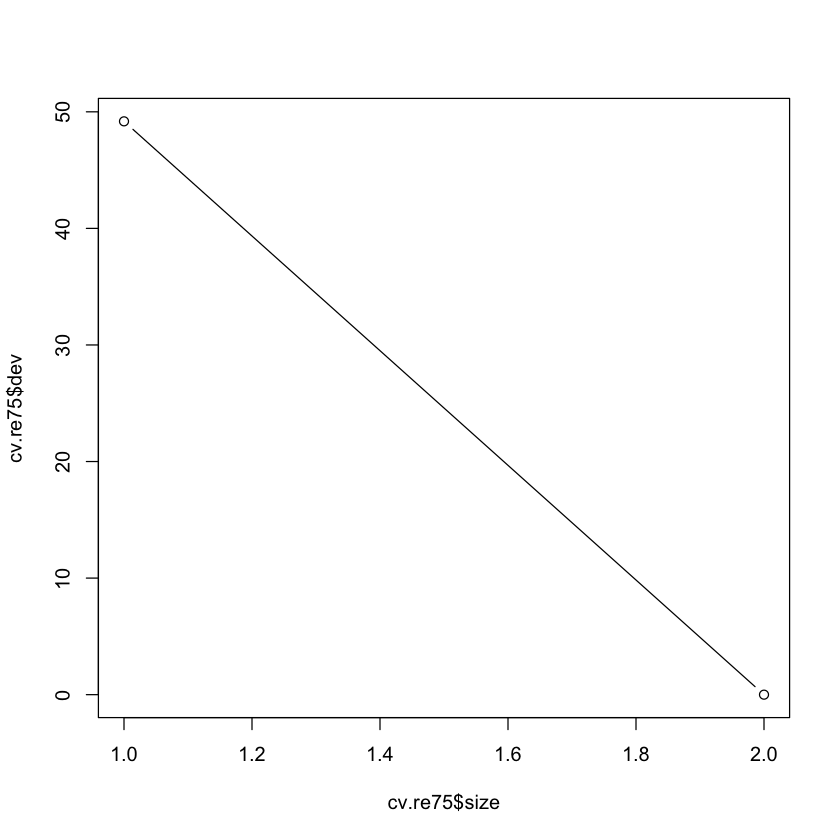

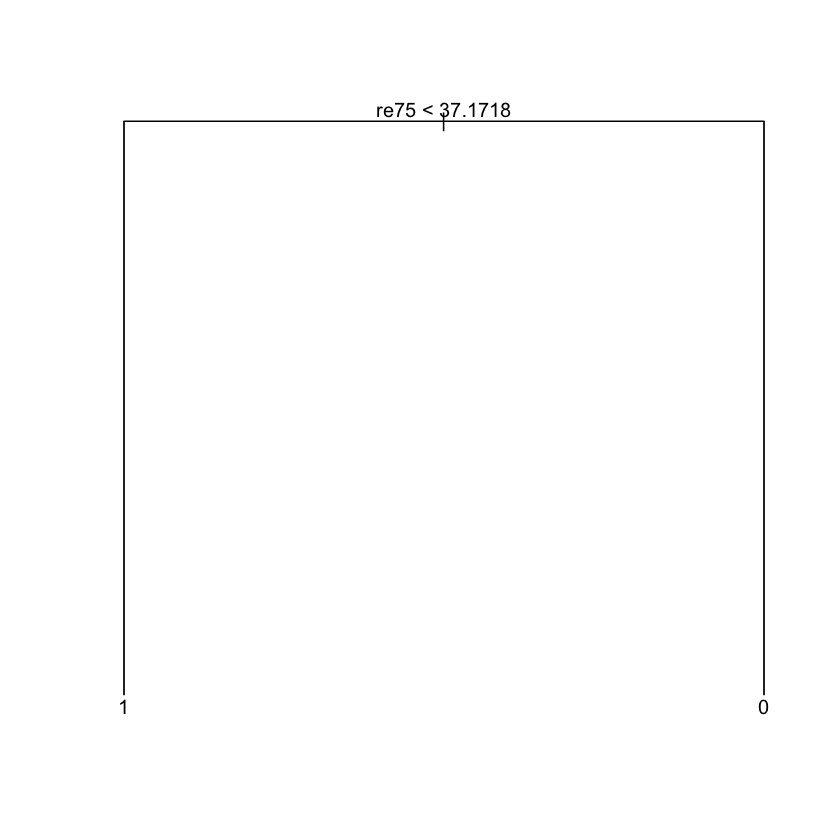

In [45]:
library(tree)
library(Matching)
data(lalonde)

# Using the lalonde data set (part of the Matching library), play with a model that predicts 
# u75 (unemployed in 1975) using any of the available features EXCEPT re78 (real earnings in 1978). 
# Come to class with some ideas about how best to predict 
# unemployment status in 1975 using the available features.

set.seed(1429)
train = sample(1:length(lalonde$re75), length(lalonde$re75)/2)

tree.re75 = tree(u75 ~ . , lalonde, subset = train)
summary(tree.re75)
plot(tree.re75); text(tree.re75 ,pretty =0)

cv.re75=cv.tree(tree.re75, )

plot(cv.re75$size ,cv.re75$dev ,type="b")
prunelalonde = prune.tree(tree.re75, best = 4)
plot(prunelalonde); text(prunelalonde, pretty = 0)

Loading required package: MASS
## 
##  Matching (Version 4.9-3, Build Date: 2018-05-03)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 311 402.90 WTF ( 0.6495 0.3505 )  
   2) educ < 8.5 39  33.49 WTF ( 0.8462 0.1538 )  
     4) age < 19.5 11   0.00 WTF ( 1.0000 0.0000 ) *
     5) age > 19.5 28  29.10 WTF ( 0.7857 0.2143 ) *
   3) educ > 8.5 272 360.90 WTF ( 0.6213 0.3787 )  
     6) age < 36.5 249 334.70 WTF ( 0.6024 0.3976 )  
      12) treat < 0.5 149 191.50 WTF ( 0.6577 0.3423 ) *
      13) treat > 0.5 100 138.50 WTF ( 0.5200 0.4800 ) *
     7) age > 36.5 23  21.25 WTF ( 0.8261 0.1739 )  
      14) treat < 0.5 12  15.28 WTF ( 0.6667 0.3333 ) *
      15) treat > 0.5 11   0.00 WTF ( 1.0000 0.0000 ) *


WTF YAY 
134   0 

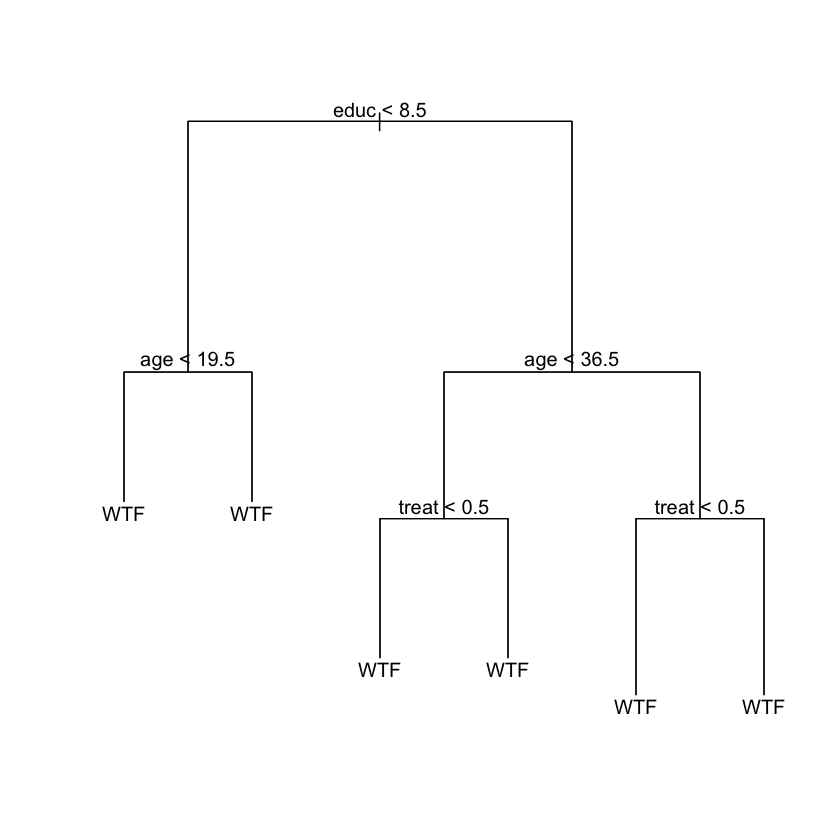

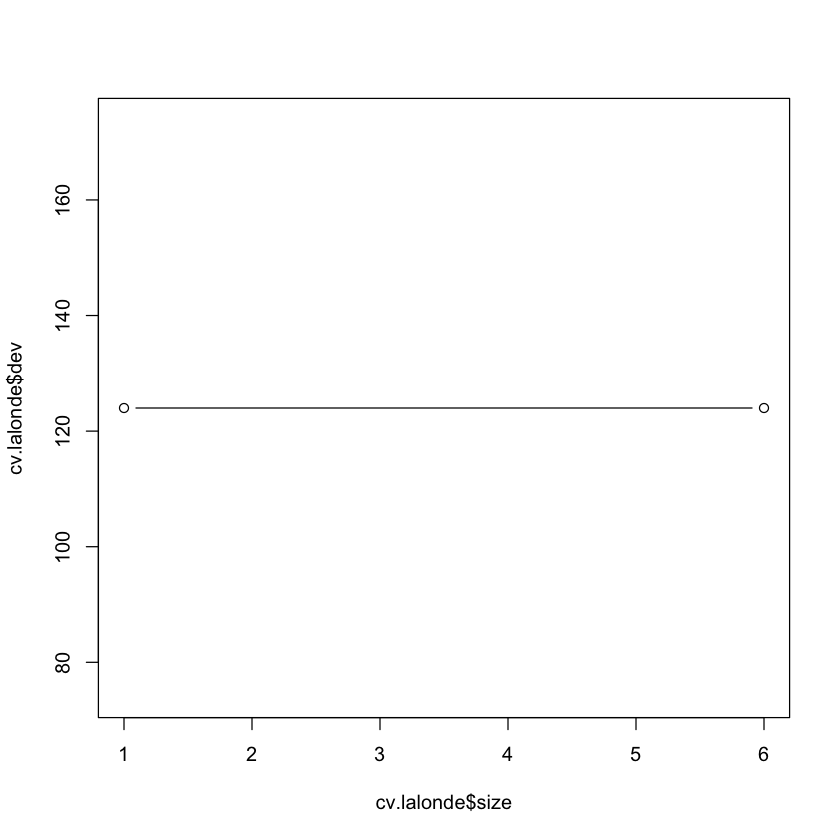

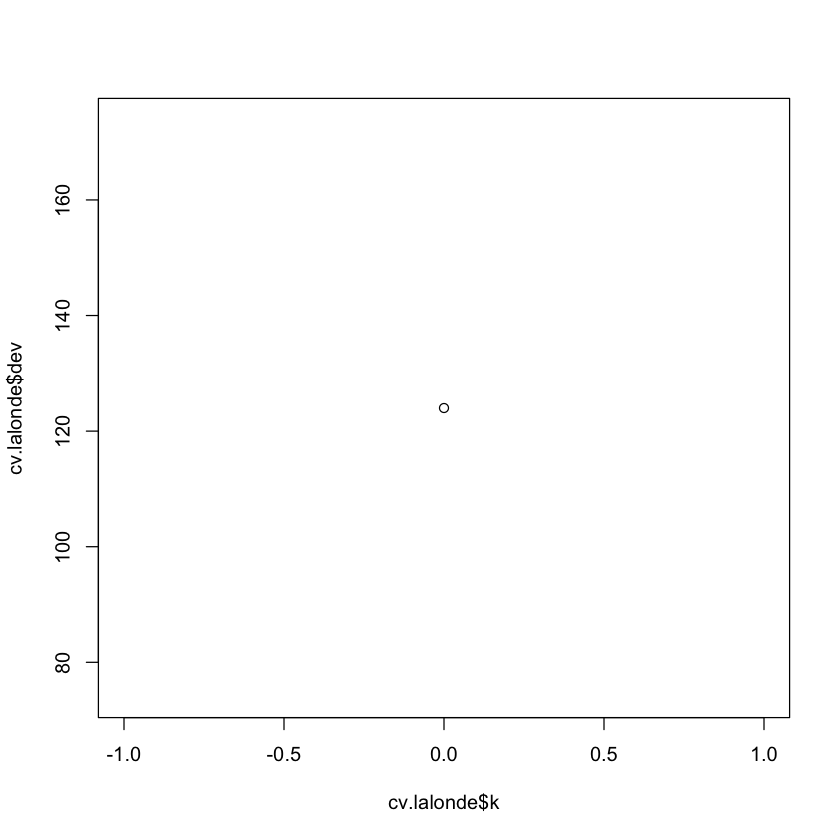

In [1]:
library(Matching); library(MASS); library(tree); library(ISLR)
data(lalonde)
data(Carseats)
set.seed(1)

lalonde$u75 = ifelse(lalonde$u75 == 1, "WTF", "YAY")
lalonde$u75 = as.factor(lalonde$u75)
train = sample(1:nrow(lalonde), 0.7*nrow(lalonde)); test = lalonde[-train,]

tree.lalonde = tree(u75 ~ . - re78 - re75 - u74 - re74, data = lalonde, subset = train)
tree.lalonde
plot(tree.lalonde); text(tree.lalonde, pretty =0)
table(predict(tree.lalonde, test, type = "class"))

cv.lalonde = cv.tree(tree.lalonde, FUN = prune.misclass)
plot(cv.lalonde$size, cv.lalonde$dev, type = "b")
plot(cv.lalonde$k, cv.lalonde$dev, type = "b")
# tree.lalonde


# tree.carseats = tree(High ~ . - Sales, data =  Carseats)
# summary(tree.carseats)
# plot(tree.carseats)
# text(tree.carseats, pretty = 0)

In [142]:
set.seed(2)
data(Carseats)
attach(Carseats)
Carseats$Sales = as.factor(ifelse(Sales <=8,"No","Yes"))

train = sample(1:nrow(Carseats), 0.7*nrow(Carseats))
test = Carseats[-test, ]

tree.carseats = tree(Sales ~. , data = Carseats, subset = train)
plot(tree.carseats); text(tree.carseats, pretty = 0)

# Carseats.test = Carseats[-train, ]
# High.test = High[-train]

# plot(tree.carseats)
# tree.pred = predict(tree.carseats, Carseats.test, type = "class")
# table(tree.pred, High.test)

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 7):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 8):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects 

ERROR: Error in `[.default`(xj, i): invalid subscript type 'list'


In [ ]:
set.seed(3)
cv.carseats = cv.tree()

